In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def show(img):
    gs = plt.GridSpec(1, 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(gs[0])
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    pass

def show_imgs(imgs):
    gs = plt.GridSpec(1, len(imgs))
    plt.figure(figsize=(10, 4))
    for (im, i) in zip(imgs, range(0, len(imgs))):
        plt.subplot(gs[i])
        plt.imshow(im)
        plt.xticks([]), plt.yticks([])
        pass
    pass

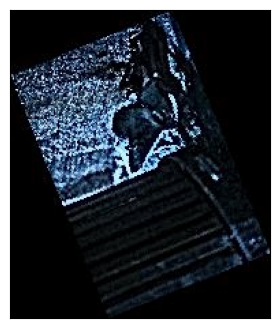

In [24]:
image = cv.imread('./Data/l3.jpg')
show(image)

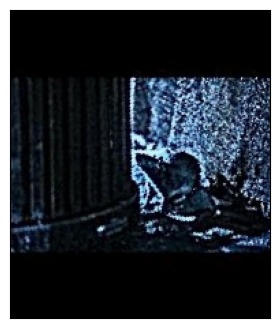

In [25]:
angle = 0
h, w = image.shape[:2]
(cX, cY) = (w // 2, h // 2)
M = cv.getRotationMatrix2D((cX, cY), (-22 - 90), 1.0)
rotated = cv.warpAffine(image, M, (round(w), round(h)))

show(rotated)

# Удаление рамок

In [26]:
def remove_zero_borders(array):
    # Find the indices of the non-zero elements along each axis
    non_zero_indices = np.nonzero(array)

    # Calculate the minimum and maximum indices along each axis
    min_indices = np.min(non_zero_indices, axis=1)
    max_indices = np.max(non_zero_indices, axis=1)

    # Crop the array based on the minimum and maximum indices
    cropped_array = array[min_indices[0]:max_indices[0]+1, min_indices[1]:max_indices[1]+1, min_indices[2]:max_indices[2]+1]

    return cropped_array

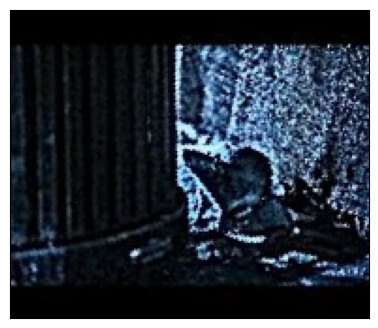

In [27]:
cutted = remove_zero_borders(rotated)
show(cutted)

# Нормализация

In [28]:
def img_gist(img_arg):
    histSize = 256
    histRange = (0, 256)  # the upper boundary is exclusive
    accumulate = False
    
    bgr_planes = cv.split(img_arg)
    
    b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
    g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
    r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
    
    hist_w = 512
    hist_h = 400
    bin_w = int(round(hist_w / histSize))
    
    histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
    cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
    cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
    cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
    
    for i in range(1, histSize):
        cv.line(histImage, (bin_w * (i - 1), hist_h - int(b_hist[i - 1])),
                (bin_w * i, hist_h - int(b_hist[i])),
                (255, 0, 0), thickness=2)
        cv.line(histImage, (bin_w * (i - 1), hist_h - int(g_hist[i - 1])),
                (bin_w * i, hist_h - int(g_hist[i])),
                (0, 255, 0), thickness=2)
        cv.line(histImage, (bin_w * (i - 1), hist_h - int(r_hist[i - 1])),
                (bin_w * i, hist_h - int(r_hist[i])),
                (0, 0, 255), thickness=2)
    
    gs = plt.GridSpec(2, 2)
    plt.figure(figsize=(10, 8))
    plt.subplot(gs[0])
    plt.hist(b_hist.reshape(-1), 256, histRange)
    plt.subplot(gs[1])
    plt.hist(g_hist.reshape(-1), 256, histRange)
    plt.subplot(gs[2])
    plt.hist(r_hist.reshape(-1), 256, histRange)
    plt.subplot(gs[3])
    plt.hist(histImage.reshape(-1), 256, histRange)
    plt.show()
    
    show(histImage)
    
    return b_hist, g_hist, r_hist

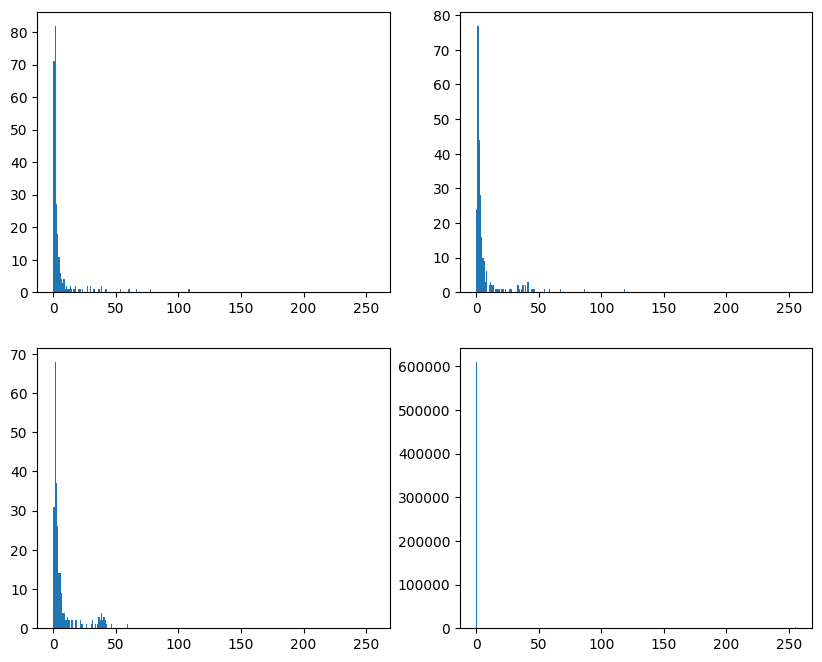

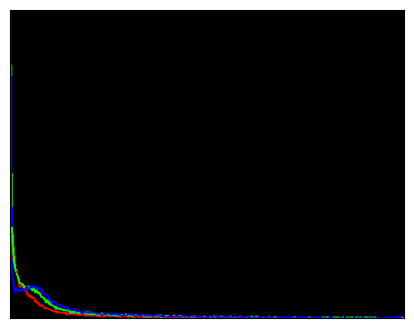

In [29]:
b_hist_c, g_hist_c, r_hist_c = img_gist(cutted)

In [30]:
def normalize_image(image):
    b, g, r = cv.split(image)

    b_eq = cv.equalizeHist(b)
    g_eq = cv.equalizeHist(g)
    r_eq = cv.equalizeHist(r)

    equalized_image = cv.merge((b_eq, g_eq, r_eq))

    return equalized_image

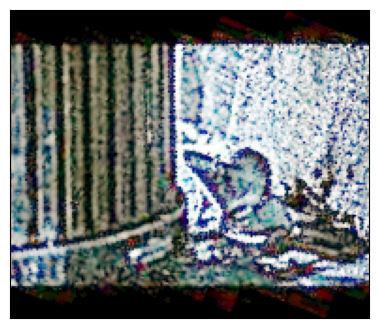

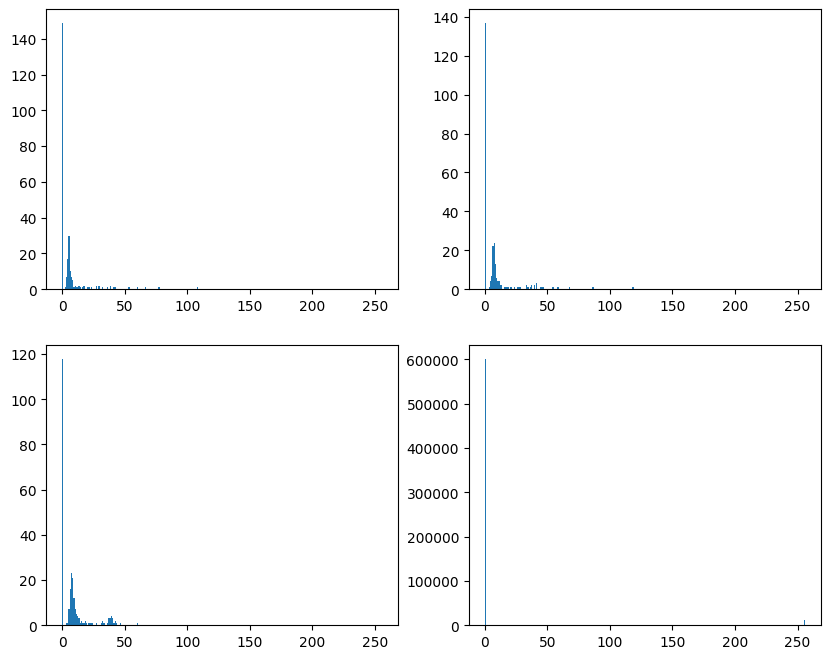

(array([[400.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [108.612976 ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [ 77.01343  ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  0.       ],
        [  

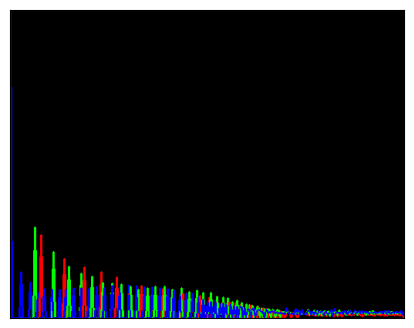

In [31]:
normilized = normalize_image(cutted.copy())
show(normilized)
img_gist(normilized)

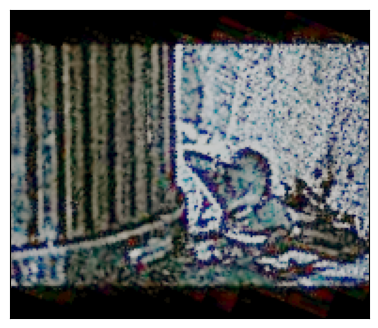

In [32]:
alpha = 200/255
beta = 125/255
adjusted_image = cv.convertScaleAbs(normilized, alpha=alpha, beta=beta)
show(adjusted_image)

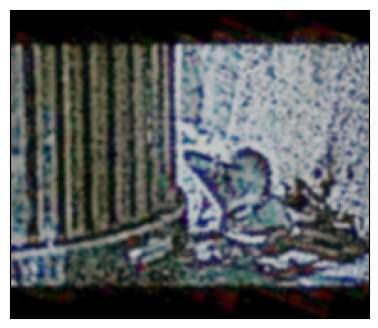

In [33]:
kernel_size = 3
blurred_image = cv.GaussianBlur(adjusted_image, (kernel_size, kernel_size), 0)
show(blurred_image)